In [1]:
from coniii import *
# address C:\Users\Riickyyy\anaconda3\envs\coniii\Lib\site-packages\coniii

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:381: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterate_neighbors(n,ix,expdJ,r):
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:2342: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def cross(vec1, vec2):


In [2]:
# Total Timeline T = 100
T = 500
# Number of neuros
N = 8

#Spike Apear Probability in Timeline 
Spikes_Probability = 0.1
#Number of Random Firing Timeline Points
N_tp = int(T * Spikes_Probability)
# Number of classify group
N_groups = 4

# Create Random Neuros Spikes Timeline (N_groups tpyes overall)
Random_NT = np.random.permutation(T)

# N_tp(10) random time points of firing for group i(overall is 4)
# Each Group Size is  (N_tp,1) contains the Random Firing Timeline Points
groups = []
for i in range(N_groups):
    start_index = i * N_tp
    end_index = (i + 1) * N_tp
    group = Random_NT[start_index:end_index]
    groups.append(group)

In [3]:
# Initializing Samples() to 0(8*10) and datatype
firing_rate = 0.8
samples = np.zeros((N,T), dtype = np.float32)

# Generate samples for each group
num_samples = int(N/N_groups)

for i, group in enumerate(groups):
    start_sample = int(num_samples * i)
    end_sample = int(num_samples * (i+1))
    samples[start_sample:end_sample, group] = (np.random.rand(num_samples, len(group)) < firing_rate)
    
# # Pick the Random Firing Timeline Points(set 2 * 10 ) in the Whole Samples
# # Use Bool to Control the T/F (1/0)
# samples[: int(N/N_groups), groups[0]] = (np.random.rand(int(N/N_groups),len(groups[0])) < firing_rate)
# samples[: int(N/N_groups), groups[1]] = (np.random.rand(int(N/N_groups),len(groups[1])) < firing_rate)
# samples[: int(N/N_groups), groups[2]] = (np.random.rand(int(N/N_groups),len(groups[2])) < firing_rate)
# samples[: int(N/N_groups), groups[3]] = (np.random.rand(int(N/N_groups),len(groups[3])) < firing_rate)

In [4]:
np.random.rand(num_samples, len(group)).shape

(2, 50)

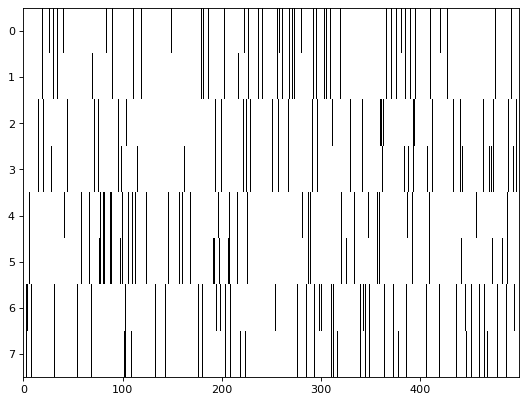

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(samples, aspect="auto", cmap="gray_r", interpolation="none")

In [6]:
from coniii.utils import define_ising_helper_functions
from coniii import ClusterExpansion, pair_corr

import matplotlib.pyplot as plt
import numpy as np

In [7]:
calc_e, calc_observables, mchApproximation = define_ising_helper_functions()

test artifical data 

In [8]:
import matplotlib.pyplot as plt
import h5py
file = h5py.File('C:\\Users\\Riickyyy\\Desktop\\RA\\~\\HEX5_K5_medium__T1800s_dT500ms_cT1s_sKInf_eF10.0mHz_eM6_nS0\\HEX5_K5_medium__T1800s_dT500ms_cT1s_sKInf_eF10.0mHz_eM6_nS0_ACTIVITY-RASTER.mat', 'r')

In [9]:
es_samples = np.array(file['activity_raster']) ##如何加进度条

In [10]:
es_samples.shape

(91, 3600)

In [11]:
es_samples[es_samples == 0] = -1

In [12]:
# Declare and call solver.

solver = ClusterExpansion(es_samples.T)

multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold=1e-2, full_output=True)

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


adaptiveClusterExpansion: Clusters of size 2


C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


adaptiveClusterExpansion: Clusters of size 3
adaptiveClusterExpansion: Clusters of size 4
adaptiveClusterExpansion: Clusters of size 5
adaptiveClusterExpansion: Clusters of size 6
adaptiveClusterExpansion: Clusters of size 7


In [25]:
N = es_samples.shape[0]

J = multipliers[N:]
# constructing the coordinates
coords = [(i, j) for i in range(1, N) for j in range(i+1, N+1)]

# filtering the values and their locations
non_zero_values = [(coords[i], val) for i, val in enumerate(J) if val != 0]

# print the results
for location, value in non_zero_values:
    print(f"Location: {location}, Value: {value}")

Location: (2, 19), Value: 0.035578677357613886
Location: (2, 35), Value: 0.11159283800486397
Location: (2, 36), Value: 0.11197212688511526
Location: (2, 37), Value: 0.34352598155309444
Location: (2, 59), Value: 0.5686617254299727
Location: (2, 61), Value: 0.07897239710146764
Location: (2, 62), Value: -0.03543486760434744
Location: (2, 88), Value: -0.9205768699639203
Location: (2, 90), Value: -0.8771439110870833
Location: (4, 11), Value: 0.6536523602659415
Location: (4, 13), Value: 0.6822159582196212
Location: (4, 24), Value: 0.48787565825657975
Location: (4, 25), Value: 0.6563651553837168
Location: (4, 26), Value: 0.6536523602659415
Location: (4, 44), Value: 0.6979896038865717
Location: (4, 70), Value: 0.6572937128625355
Location: (6, 16), Value: 0.6398417812503367
Location: (6, 32), Value: 0.6476796581805295
Location: (6, 56), Value: 0.6896124509296097
Location: (6, 82), Value: 0.5961525047036802
Location: (7, 16), Value: 0.6032619885338136
Location: (7, 19), Value: -0.238954136643803

In [52]:
first_elements = [row[0] for row in non_zero_values]


In [55]:
from itertools import combinations

# 定义你的列表
list1 = [14,15,17,28,29,30,31,33,47,48,49,51,52,76,80]
list2 = [9,10,20,21,22,39,40,41,63,64,8,38,65,66]
list3 = [6,7,16,17,32,33,34,53,54,55,82,84,56]
list4 = [2,7,18,19,35,36,37,59,60,61,62,88,90]
list5 = [1,4,11,12,13,23,24,25,26,44,45,46,69,70]

# 将所有列表放到一个大列表里
lists = [list1, list2, list3, list4, list5]

# 使用一个set存储所有的唯一对
unique_pairs_set = set()

# 对于大列表中的每一个列表，使用itertools.combinations找到所有的两两组合
for lst in lists:
    pairs = combinations(lst, 2)
    sorted_pairs = [tuple(sorted(pair)) for pair in pairs]
    unique_pairs_set.update(sorted_pairs)

# 为了方便查看，可以转换成列表并打印
grand_truth = list(unique_pairs_set)

TypeError: 'list' object is not callable

In [13]:
nonzero_indices = np.nonzero(multipliers)

In [14]:
(nonzero_indices[0]).shape

(378,)

In [15]:
N = es_samples.shape[0]

J = multipliers[N:]

# 创建一个 N*N 的零矩阵
matrix = np.zeros((N, N))

# # 使用数组的前N个元素填充对角线
# matrix[np.diag_indices(FISH_N)] = multipliers[:FISH_N]

# 使用数组的后N+2(N*N-1)个元素填充上半矩阵
index = N
for i in range(N):
    for j in range(i+1, N):
        matrix[i, j] = multipliers[index]
        index += 1
# 获取上半矩阵（包含对角线）
upper_matrix = np.triu(matrix)

# 转置上半矩阵并将其添加到下半部分
lower_matrix = np.transpose(upper_matrix)
lower_matrix = np.tril(lower_matrix, -1)

# 将上半矩阵和转置的下半矩阵相加得到完整的矩阵
final_matrix = upper_matrix + lower_matrix

In [16]:
final_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.87714391,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.87714391,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

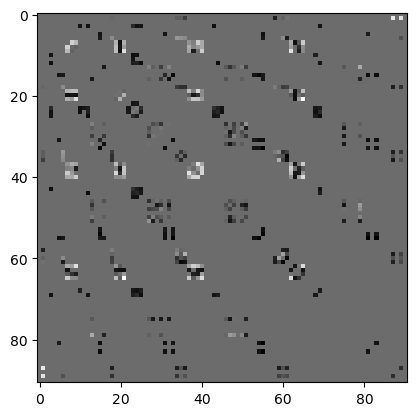

In [17]:
plt.imshow(final_matrix, cmap='gray_r')

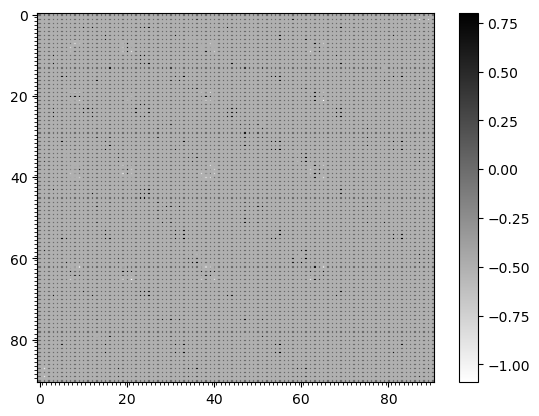

In [18]:
#plot imshow and add lines
plt.imshow(final_matrix, aspect="auto", cmap="gray_r")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, final_matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, final_matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()

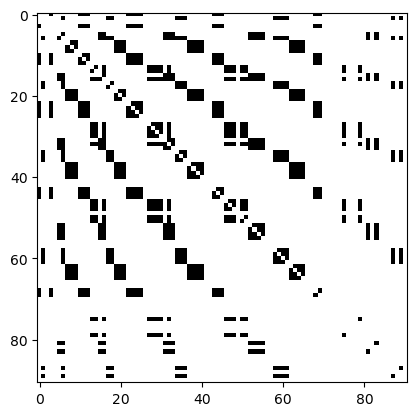

In [19]:
import numpy as np

# 创建91x91的0矩阵
matrix = np.zeros((91, 91))

# 给出的数组
arrays = [
    np.array([14,15,17,28,29,30,31,33,47,48,49,51,52,76,80], dtype=np.uint16),
    np.array([9,10,20,21,22,39,40,41,63,64,8,38,65,66], dtype=np.uint16),
    np.array([6,7,16,17,32,33,34,53,54,55,82,84,56], dtype=np.uint16),
    np.array([2,7,18,19,35,36,37,59,60,61,62,88,90], dtype=np.uint16),
    np.array([1,4,11,12,13,23,24,25,26,44,45,46,69,70], dtype=np.uint16)
]

# 把数组的元素映射到矩阵上
for arr in arrays:
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            # 设置对应位置为1，这里我们使用 index-1 是因为 numpy 的索引是从0开始的
            matrix[arr[i]-1, arr[j]-1] = 1
            matrix[arr[j]-1, arr[i]-1] = 1  # 如果关系是双向的，我们需要同时设置两个位置

plt.imshow(matrix, cmap='gray_r')



In [20]:
((np.nonzero(matrix))[0]).shape

(884,)

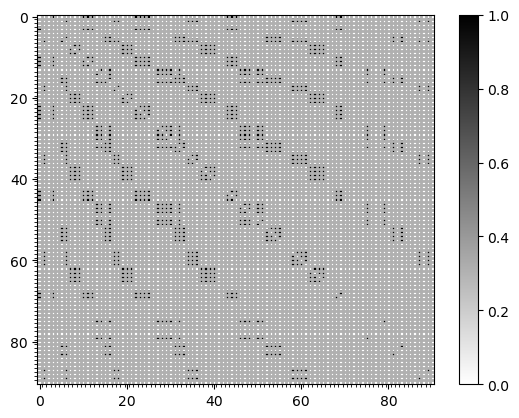

In [21]:
#plot imshow and add lines
import matplotlib.pyplot as plt
plt.imshow(matrix, aspect="auto", cmap="gray_r")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()

In [26]:
list1 = [14,15,17,28,29,30,31,33,47,48,49,51,52,76,80]
list2 = [9,10,20,21,22,39,40,41,63,64,8,38,65,66]
list3 = [6,7,16,17,32,33,34,53,54,55,82,84,56]
list4 = [2,7,18,19,35,36,37,59,60,61,62,88,90]
list5 = [1,4,11,12,13,23,24,25,26,44,45,46,69,70]

# Combine all lists
combined_list = list1 + list2 + list3 + list4 + list5

# Convert to a set to remove duplicates
unique_set = set(combined_list)

# Get the count of unique elements
count = len(unique_set)

In [27]:
count

66

In [28]:
list1 = [14,15,17]
list2 = [9,10,20]
list3 = [6,7,16]
list4 = [2,7,18]
list5 = [1,4,11]

# Combine all lists
combined_list = list1 + list2 + list3 + list4 + list5

# Convert to a set to remove duplicates
unique_set = set(combined_list)

# Get the count of unique elements
count = len(unique_set)

print("Number of unique elements: ", count)

Number of unique elements:  14


In [29]:
unique_set

{1, 2, 4, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 20}

In [37]:
from itertools import combinations

# 定义你的列表
list1 = [14,15,17]
list2 = [9,10,20]
list3 = [6,7,16]
list4 = [2,7,18]
list5 = [1,4,11]

# 将所有列表放到一个大列表里
lists = [list1, list2, list3, list4, list5]

# 对于大列表中的每一个列表，使用itertools.combinations找到所有的两两组合
for i, lst in enumerate(lists):
    unique_pairs = list(combinations(lst, 2))
    print(f'在 list{i+1} 中的唯一组合是: {unique_pairs}')

TypeError: 'list' object is not callable

In [38]:
print("2342343")

2342343
